In [7]:
# Import packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt


In [8]:
#load mnist from torch

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


0it [00:00, ?it/s]

9920512it [00:01, 7634862.75it/s]                             


Extracting /home/ubuntu/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/ubuntu/.pytorch/MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135879.20it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /home/ubuntu/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/ubuntu/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 2249339.33it/s]                           
0it [00:00, ?it/s]

Extracting /home/ubuntu/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/ubuntu/.pytorch/MNIST_data/MNIST/raw


8192it [00:00, 52679.27it/s]            


Extracting /home/ubuntu/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/ubuntu/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [10]:
# create data iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


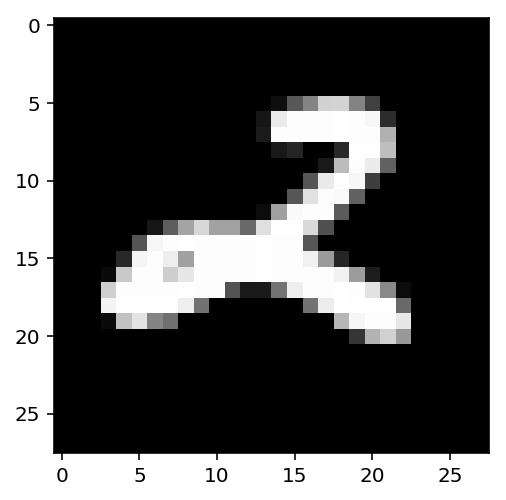

In [14]:
# show an iamge
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

In [19]:
# Simple Neural Network / Flatten images

def sigmoid(x):
    return 1/(1+torch.exp(-x))

# flatten input images
inputs = images.view(images.shape[0], -1) # -1 shortcut for length of elements

# parameters
w1 = torch.randn(784,256) # Input to hidden units
b1 = torch.randn(256) # Bias for hidden units

w2 = torch.randn(256, 10) # weights from hidden to output
b2 = (10) # bias for outputs

h = sigmoid(torch.mm(inputs, w1)+b1)

out = torch.mm(h, w2) + b2




In [21]:
## Softmax 
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [26]:
from torch import nn

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [28]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [29]:
import torch.nn.functional as F



In [30]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x